In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from transform_output_format import get_4D_output

2022-12-08 13:29:31.286908: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 13:29:31.606582: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 13:29:31.606626: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-08 13:29:34.525129: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
# Load data from raw_data
data = np.load('../raw_data/processed_data/feature/1.npy', allow_pickle=True)

In [7]:
print(data.shape)

(2, 124, 4, 81, 81)


In [5]:
y = np.load('../raw_data/processed_data/Y_train/1.npy', allow_pickle=True)

In [6]:
#y=get_4D_output(y)
print(y.shape)

(124, 4, 51, 51)


In [8]:
X_train=np.zeros((3,4,51,51,2))
for j in range (3):
    for i in range (4):
        for k in range (51):
            for h in range (51):
                for z in range (2):
                    if z==0:
                        X_train[j,i,k,h,z]=data[0,j,i,k+15,h+15]
                    if z==1:
                        X_train[j,i,k,h,z]=data[1,j,i,k+15,h+15]
                                                         
X_train.shape

(3, 4, 51, 51, 2)

In [9]:
X_val=np.zeros((1,4,51,51,2))
for j in range (1):
    for i in range (4):
        for k in range (51):
            for h in range (51):
                for z in range (2):
                    if z==0:
                        X_val[j,i,k,h,z]=data[0,j+3,i,k+15,h+15]
                    if z==1:
                        X_val[j,i,k,h,z]=data[0,j+3,i,k+15,h+15]
                                
X_val.shape

(1, 4, 51, 51, 2)

In [10]:
y_train=np.zeros((3,4,51,51,2))
for j in range (3):
    for i in range (4):
        for k in range (51):
            for h in range (51):
                for z in range (2):
                    if z==0:
                        y_train[j,i,k,h,z]=y[j,i,k,h]
                    if z==1:
                        y_train[j,i,k,h,z]=y[j,i,k,h]
y_train.shape

(3, 4, 51, 51, 2)

In [11]:
y_val=np.zeros((1,4,51,51,2))
for j in range (1):
    for i in range (4):
        for k in range (51):
            for h in range (51):
                for z in range (2):
                    if z==0:
                        y_val[j,i,k,h,z]=y[j+3,i,k,h]
                    if z==1:
                        y_val[j,i,k,h,z]=y[j+3,i,k,h]
y_val.shape

(1, 4, 51, 51, 2)

In [12]:
inp=layers.Input(shape=(None, *X_train.shape[2:]))

x= layers.ConvLSTM2D(filters=64, kernel_size=(5,5), 
                     padding='same',
                     return_sequences=True, 
                     activation='relu',
                    )(inp)
x=layers.BatchNormalization()(x)
x=layers.Conv3D(filters=1, kernel_size=(3,3,3),
                activation="relu", 
                padding="same")(x)
model=keras.models.Model(inp,x)
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanAbsoluteError(), 
              metrics=keras.metrics.MeanAbsoluteError())


2022-12-08 13:33:29.188196: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-08 13:33:29.188316: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-08 13:33:29.188483: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PC-Francesco): /proc/driver/nvidia/version does not exist
2022-12-08 13:33:29.189467: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
#Define some callbacks to improve training
early_stopping=keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
reduce_lr=keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=5)

#Define modificable training hyperparameters
epochs=20
batch_size=5

#Fit the model to the training data
history=model.fit(X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr], verbose=1
)



Epoch 1/20
1/1 [==============================] - 19s 19s/step - loss: 417.5142 - mean_absolute_error: 417.5142 - val_loss: 162.7878 - val_mean_absolute_error: 162.7878 - lr: 0.0010
Epoch 2/20
1/1 [==============================] - 5s 5s/step - loss: 417.4296 - mean_absolute_error: 417.4296 - val_loss: 157.1384 - val_mean_absolute_error: 157.1384 - lr: 0.0010
Epoch 3/20
1/1 [==============================] - 5s 5s/step - loss: 417.2005 - mean_absolute_error: 417.2005 - val_loss: 163.1295 - val_mean_absolute_error: 163.1295 - lr: 0.0010
Epoch 4/20
1/1 [==============================] - 5s 5s/step - loss: 417.1022 - mean_absolute_error: 417.1022 - val_loss: 163.1805 - val_mean_absolute_error: 163.1805 - lr: 0.0010
Epoch 5/20
1/1 [==============================] - 4s 4s/step - loss: 416.9340 - mean_absolute_error: 416.9340 - val_loss: 162.4540 - val_mean_absolute_error: 162.4540 - lr: 0.0010
Epoch 6/20
1/1 [==============================] - 5s 5s/step - loss: 416.7252 - mean_absolute_erro

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error', 'lr'])


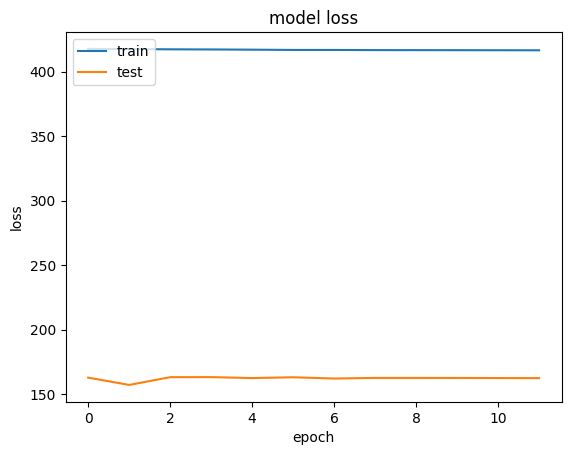

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
#plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('../raw_data/MAE_Plot/1.png')
